# Task  3 - To Explore UnSupervise Machine Learning

**Problem Statement :** From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

**Auther : SHUBHAM G GAJBHIYE**


In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import os
% matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# read train data
path = '/content/drive/My Drive/Assingment/'
data = pd.read_csv(os.path.join(path,'Iris.csv'))

In [ ]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


*Lets Start With EDA*

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
# check null values
data.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [ ]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
data_copy = data.copy(deep=True)

In [ ]:
# Since we are assuming that the data class is unsupervise lets drop traget columns from dataset
data_copy.drop(columns=['Id','Species'],inplace = True)

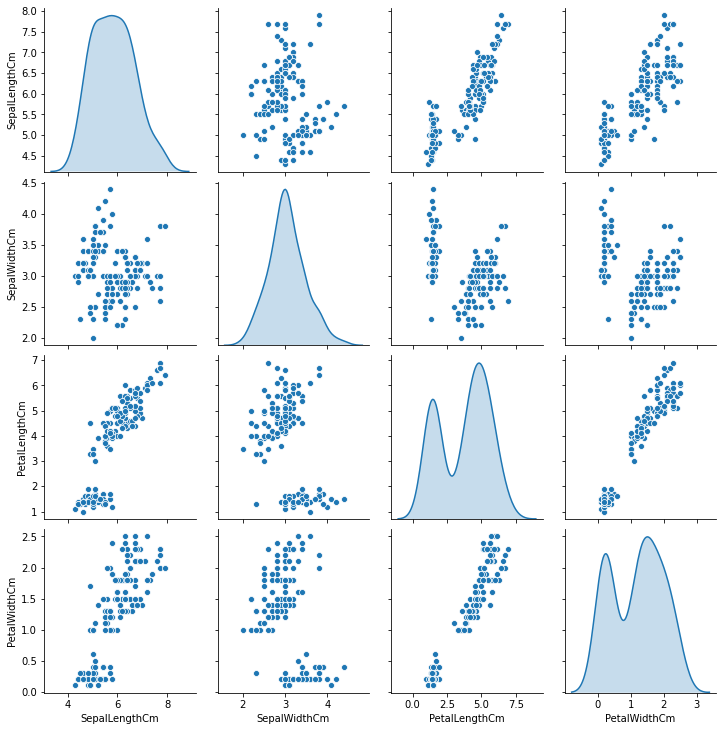

In [ ]:
sb.pairplot(data_copy,diag_kind='kde')

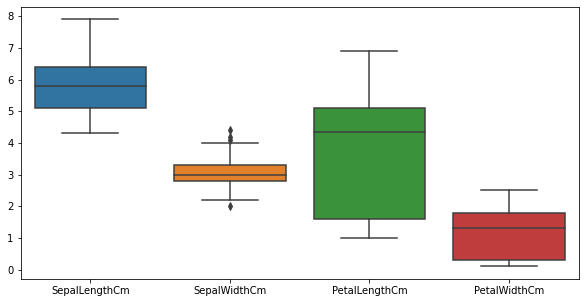

In [ ]:
plt.figure(figsize=(10,5))
sb.boxplot(data=data_copy)

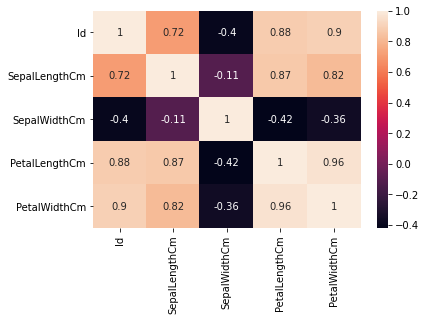

In [ ]:
sb.heatmap(data.corr(),annot=True)

**Note:**


> 1. From the EDA , we can conclude that SepalWiidthCM is more skewed and having more outlier .Also in PetalLengthCM and PetalWidthCm are less skewed.
> 2. From corr heatmap, we can see that most of features are correlated lets decide corr threshold in 95% then PetalWidthCm and PetalLengthCm is highly correlated so we can drop one of the feature from it.
> 3. By looking into kde plot of pairplot we can say that at least there will be 2 target but there can be more that 2 also we need to check that.









**Preparing Training and Testing Data**

In [ ]:
# Lets Normalized the data 
std_scaler = StandardScaler()
x = std_scaler.fit_transform(data_copy)


**Build and Train Unsupervise Model**

In [ ]:
dbscan_model = DBSCAN(eps=0.5,min_samples=5)
dbscan_model.fit(x)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [ ]:
dbscan_model.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
       -1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1])

In [ ]:
cluster = dbscan_model.fit_predict(x)

**Note :**

> '-1' represents the noisy samples, 1 and 0 represent the class/label
> But in total we can use -1,1,0 as labels





In [ ]:
print('DBSCAN: {}'.format(silhouette_score(x, dbscan_model.labels_, 
                                           metric='cosine')))

DBSCAN: 0.35977706390369996


In [ ]:
data_copy['labels'] = dbscan_model.labels_
data_copy['Species'] = data.Species
data_copy.labels.replace(to_replace = -1 , value = 2 , inplace = True)

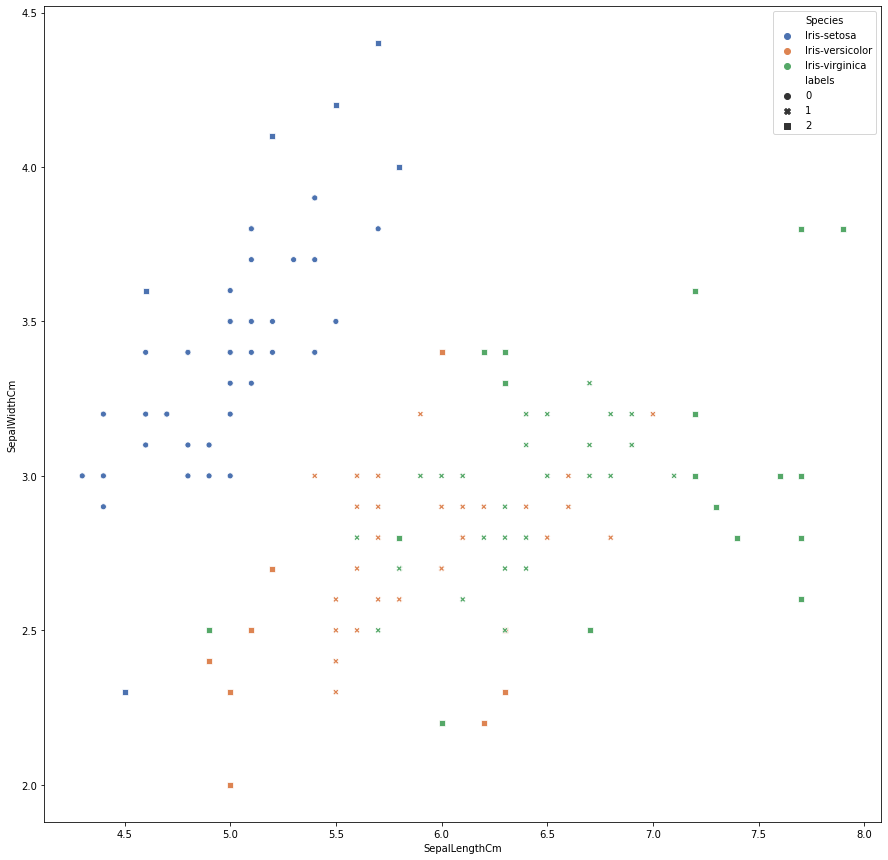

In [ ]:
plt.figure(figsize=(15,15))
sb.scatterplot(x = data_copy.SepalLengthCm, y = data_copy.SepalWidthCm , hue = 'Species',style= data_copy.labels,data = data_copy ,palette="deep")

In [ ]:
data_pred = data_copy.copy(deep=True)
data_true = data_copy.copy(deep=True)

In [ ]:
data_pred.drop(columns= 'Species',inplace = True)
data_true.drop(columns='labels',inplace=True)

In [ ]:
data_pred.set_index('labels',inplace = True)
data_true.set_index('Species',inplace = True)

In [ ]:
print(f"Mean values for label \ n {data_pred.groupby(by='labels').mean()} \n\n")
print(f"Mean values for Species \ n {data_true.groupby(by='Species').mean()}\n\n")
print(f"Std values for label \ n {data_pred.groupby(by='labels').std()}\n\n")
print(f"std values for Species \ n {data_true.groupby(by='Species').std()}")



Mean values for label \ n         SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
labels                                                          
0            4.977273      3.370455       1.484091      0.245455
1            6.184507      2.884507       4.781690      1.640845
2            6.240000      3.000000       4.542857      1.500000 


Mean values for Species \ n                  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Species                                                                  
Iris-setosa              5.006         3.418          1.464         0.244
Iris-versicolor          5.936         2.770          4.260         1.326
Iris-virginica           6.588         2.974          5.552         2.026


Std values for label \ n         SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
labels                                                          
0            0.313913      0.279184       0.162743      0.108809
1            0.467714     

**Summary**


1. By looking into the scatter plot you can see that there are many class who miss classify themself
2. Also there is much deviation in SepalWidthCm and SepalLengthCm while comparing laband Species as there are many miss classification has done eg  
        a.   Label 2 has classified as for Virginia and Sertosa which is not good
3. Also silhouette_score is very less , So in order to increase silhouette score either we can use different algo like k-means or hier clustering or we can fine tune the hyperparameters of DBSCAN algo  


